# 泰坦尼克号数据分析

## 分析内容

### 分析点

通过泰坦尼克号数据分析哪些因素会使船上的人生还率更高？

### 猜测

影响生还率的因素可能有：**性别**， **年龄**以及**船票等级**

猜测它们之间的关系是：

1. 女性的生还率比男性高
2. 青壮年（预测年龄在18〜45岁之间）的生还率比较高
3. 船票等级越高，说明越有钱或有身份，他们的生还率可能会更高



## 数据分析

### 猜测1 女性的生还率比男性高

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic_data = pd.read_csv("/Users/bill/Documents/pycharm/p4/titanic-data.csv")

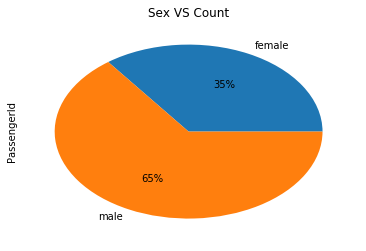

In [18]:
t = titanic_data.groupby('Sex')['PassengerId'].count()
t.plot(kind = 'pie', autopct = '%.0f%%')
plt.title('Sex VS Count')
plt.show()

在所有乘客数据中，女性和男性的占分别为 35% 和 65%。明显男性乘客居多

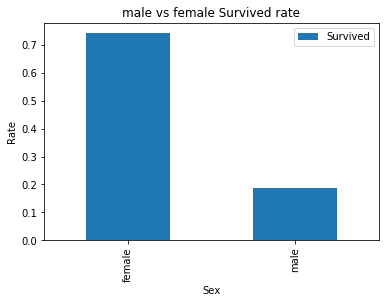

In [26]:
sex_sur = titanic_data[['Sex', 'Survived']]
sex_sur_g = sex_sur.groupby("Sex")
c = sex_sur_g.mean()
cp = c.plot(kind='bar',title='male vs female Survived rate')
cp.set_xlabel('Sex')
cp.set_ylabel('Rate')
plt.show()

In [14]:
print '女性生还人数 ', t['female'] * c.loc['female', 'Survived']
print '男性生还人数 ', t['male'] * c.loc['male', 'Survived']

女性生还人数  232.99999999999997
男性生还人数  109.0


通过对泰坦尼克号上的男女性生还的平均数，我们可以看到，女性的平均生还的**平均数**远比男性高
通过两者数据对照，女性乘客虽然不多，但生还了233个人，而男性在生还人数上则少于女性的一半

因此，**猜测1**成立

### 猜测2 青壮年的生还率比较高

**青壮年定义**

将 *16* 到 *45* 岁之间的人定义为青壮年



#### 数据处理

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


通过上面对数据的分析，发现分析需要用到的Age值出现缺失的情况，样本总数为891，而Age记录为714，因此需要对数据进行清洗，提取出有效的数据

In [5]:
age_sur = titanic_data[['Age', 'Survived']]
age_sur_remove_invalid_data = age_sur[age_sur['Age'].notnull()]
age_sur_just_surd = age_sur_remove_invalid_data[age_sur_remove_invalid_data['Survived'] == 1]

处理完之后，有效的数据存放于 **age_sur_remove_invalid_data** 数据集中, 再来分析这个数据集合的话，发现无效数据已被处理完成

In [6]:
age_sur_remove_invalid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 2 columns):
Age         714 non-null float64
Survived    714 non-null int64
dtypes: float64(1), int64(1)
memory usage: 16.7 KB


处理完数据，我们得到了有效的用户数据，因此，我们看下每个年龄的数据统计

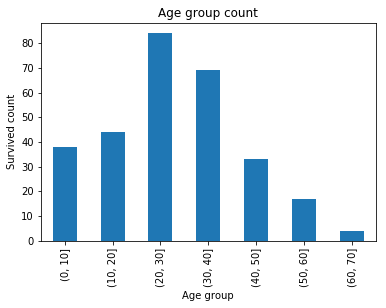

In [27]:
bins = range(0, 80)[::10]
ap = pd.value_counts(pd.cut(age_sur_just_surd['Age'], bins)).sort_index().plot(kind='bar', title='Age group count')
ap.set_xlabel('Age group')
ap.set_ylabel('Survived count')
plt.show()

通过上面的直方图可以看到，在*被救*的数据里，每个年龄的生还数量大致成一个**正态分布**，处于16到48岁之间的年龄更容易生还

通过计算可知，16到48岁之间的生还的人占总生还人数的70%

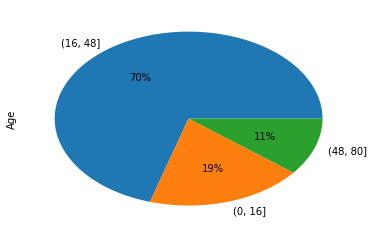

In [31]:
bins = [0, 16, 48, 80]
age_sur_g = pd.value_counts(pd.cut(age_sur_just_surd['Age'], bins))
t = age_sur_g / age_sur_g.sum()
t.plot(kind='pie', autopct='%2.0f%%')
plt.show()

然而对比所有的数据我们发现，16到48周岁的乘客基数过大，故这个猜测并无实际价值。下面为两组数据的对比

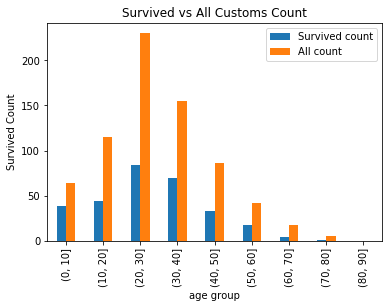

In [40]:
bins = range(0, 100)[::10]
c = pd.cut(age_sur_just_surd['Age'], bins)
tt = pd.value_counts(c)

x = pd.cut(age_sur_remove_invalid_data['Age'], bins)
xx = pd.value_counts(x)

tt.rename(columns={"Age": "Survived count"}, inplace=True)
cs = pd.concat([tt, xx], axis=1)
cs.rename(columns={0: "Survived count", "Age": "All count"}, inplace=True)
cstt = cs.plot(kind='bar', title='Survived vs All Customs Count')
cstt.set_xlabel('age group')
cstt.set_ylabel('Survived Count')
plt.show()

不过，值得注意的是，上图中，0〜10岁这个年龄段两条柱的对比相关不大，说明在整个年龄分组中，0〜10岁的人群生还的概率会比较大

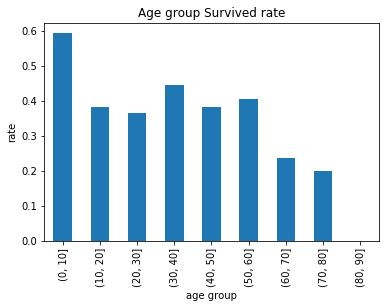

In [48]:
cpx = tt / xx
pxu = cpx.plot(kind='bar', title='Age group Survived rate')
pxu.set_xlabel('age group')
pxu.set_ylabel('rate')
plt.show()

### 猜测3 船票等级越高，说明越有钱或有身份，他们的生还率可能会更高

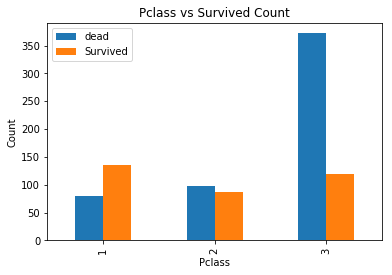

In [35]:
p_data = titanic_data[['Survived', 'Pclass', 'Name']]
p_data_g = p_data.groupby(['Survived', 'Pclass'])
c = p_data_g.count()

p = [[0, 0], [0, 0], [0, 0]]
for key in c.index:
    p[key[1] - 1][key[0]] = c.reindex([key]).values[0][0]
    
df = pd.DataFrame(data=p, index=[1, 2, 3], columns=['dead', 'Survived'])
dx = df.plot(kind='bar', title='Pclass vs Survived Count')
dx.set_xlabel('Pclass')
dx.set_ylabel('Count')
plt.show()

通过生还数据对比图，头等仓的乘客相对的存活率比二等或三等仓高

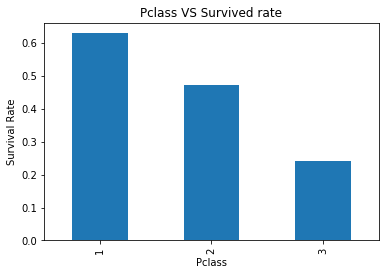

In [24]:
titanic_data.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('Pclass VS Survived rate')
plt.ylabel('Survival Rate')
plt.show()

通过饼图可以看到，头等仓的生还比例大于二三等仓的的比例
因此，此结论也是成立的！

## 总结

通过以上三个维度对样本数据进行分析，女性生还率高，但，样本中，年龄并不能说明什么问题, 虽然0〜10岁的乘客生还率高，但整体基数小。而住头等仓的乘客明显比获取得较高的生还率。
这个符合我们的预期，社会风气以及道德标准提倡优先救小孩和女性，同时，头等仓的乘客更有能量获得优先被救权

在获取到的样本中，我们拿到的并不是全体乘客的数据，因此会存在偏差，并不能代表整体人口。因此结论并不准确。

当然，仅对数据分析而言，还可以有别个有意思的维度去分析数据，比如，分析各个港口上船的生还率，如果存在明显差异，说明哪个那个港口风水好（运气好）